In [33]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.preprocessing import normalize

INIT_PATH_IMG = '/Users/nurmukhammed/Desktop/MSc2/IoT/Final Project/Technical part/DB of faces/'

def load_img_tf(l_path, r_path):

    im_raw = cv2.imread(INIT_PATH_IMG + l_path)
    init_l = cv2.cvtColor(im_raw, cv2.COLOR_BGR2RGB)

    l_img = tf.io.read_file(INIT_PATH_IMG + l_path)
    l_img = tf.io.decode_image(l_img, channels=3, expand_animations=False)
    l_resized_img = tf.image.resize(l_img, [112,112])
    l_norm_img = (tf.cast(l_resized_img, "float32") - 127.5) * 0.0078125

    im_raw = cv2.imread(INIT_PATH_IMG + r_path)
    init_r = cv2.cvtColor(im_raw, cv2.COLOR_BGR2RGB)
    r_img = tf.io.read_file(INIT_PATH_IMG + r_path)
    r_img = tf.io.decode_image(r_img, channels=3, expand_animations=False)
    r_resized_img = tf.image.resize(r_img, [112,112])
    r_norm_img = (tf.cast(r_resized_img, "float32") - 127.5) * 0.0078125

    return init_l, init_r, l_norm_img, r_norm_img

normalize_img = Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))

def load_img(l_path, r_path):

    im_raw = cv2.imread(INIT_PATH_IMG + r_path)
    r_img = cv2.cvtColor(im_raw, cv2.COLOR_BGR2RGB)
    r_img = cv2.resize(r_img, (112, 112), interpolation = cv2.INTER_AREA)
    r_img = normalize_img.apply(r_img)
    init_l = cv2.cvtColor(im_raw, cv2.COLOR_BGR2RGB)

    im_raw = cv2.imread(INIT_PATH_IMG + l_path)
    l_img = cv2.cvtColor(im_raw, cv2.COLOR_BGR2RGB)
    l_img = cv2.resize(l_img, (112, 112), interpolation = cv2.INTER_AREA)
    l_img = normalize_img.apply(l_img)
    init_r = cv2.cvtColor(im_raw, cv2.COLOR_BGR2RGB)

    return init_l, init_r, l_img, r_img

def dist(l_emmbed, r_emmbed):

  def normed_vector(emmbed):
    norm  = tf.expand_dims(tf.norm(emmbed, axis=1), axis=1)
    norm_vector = tf.divide(emmbed, norm)
    return norm_vector

  def distance(embeddings1, embeddings2):
    diff = np.subtract(embeddings1, embeddings2)
    dist = np.sum(np.square(diff),1)
    return dist

  def cos_distance(embeddings1, embeddings2):
    dist = np.array([])
    for i in range(embeddings1.shape[0]):
      
      cos_dist = spatial.distance.cosine(embeddings1[i], embeddings2[i])
      dist = np.append(dist, cos_dist)
    
    return dist

  r_norm_emmbed = normed_vector(r_emmbed)
  l_norm_emmbed = normed_vector(l_emmbed)

  dist = cos_distance(l_norm_emmbed, r_norm_emmbed)

  return dist

def show_plot(l_img, r_img):
  
  im = l_img
  plt.imshow(im)
  plt.axis('off')
  plt.show()

  im = r_img
  plt.imshow(im)
  plt.axis('off')
  plt.show()


def is_same(dist, thr):
  if dist >= thr:
    print("This two face IS SAME")
  else:
    print("This two face IS NOT SAME")
    
#'bari/1.JPG', 'bari/7.JPG'

def print_results(l_img_pth, r_img_pth):
  #init_l, init_r, l_img, r_img = load_img_tf(l_img_pth, r_img_pth)
  init_l, init_r, l_img, r_img = load_img(l_img_pth, r_img_pth)
  show_plot(init_l, init_r)

#   l_emb = arc_model(np.expand_dims(np.moveaxis(l_img, -1, 0), axis=0), training=False)
#   r_emb = arc_model(np.expand_dims(np.moveaxis(r_img, -1, 0), axis=0), training=False)

  l_emb = arc_model(np.expand_dims(l_img, axis=0), training=False)
  r_emb = arc_model(np.expand_dims(r_img, axis=0), training=False)

  
  emb1 = normalize(l_emb)
  emb2 = normalize(r_emb)
  dists = (emb1 * emb2).sum(1)
  distance = dists

  # distance = dist(l_emb, r_emb)
  print('cos_similarity : ', distance)
  is_same(distance, acc_thresh)


ArcFace Model
THRESH_HOLD : 0.200000


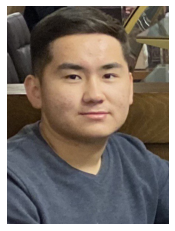

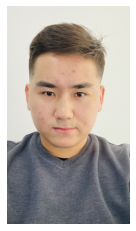

cos_similarity :  [0.44463341]
This two face IS SAME


In [38]:
acc_thresh = 0.2
print("ArcFace Model")
print('THRESH_HOLD : %f' % acc_thresh)

print_results('Nurmukhammed Abeuov/photo5337127646108169519.jpg', 'Nurmukhammed Abeuov/photo5337127646108169533.jpg')


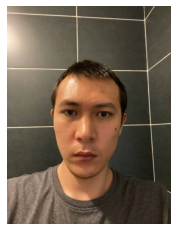

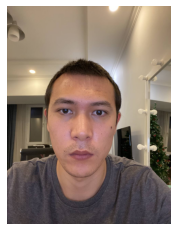

cos_similarity :  [0.59991137]
This two face IS SAME


In [39]:
print_results('Suleimen Daukishov/photo5337277171099613206.jpg', 'Suleimen Daukishov/photo5337277171099613208.jpg')